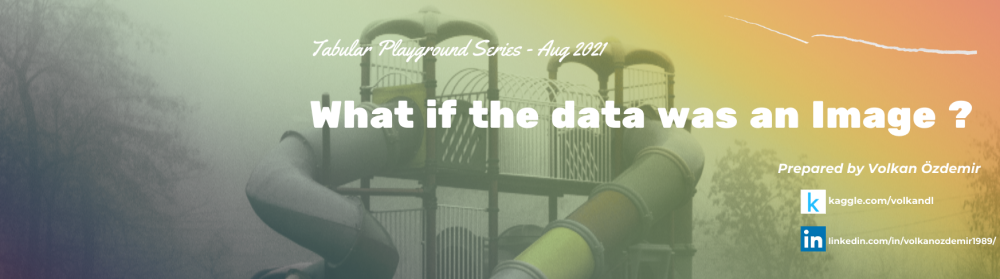

## $\color{Pink}{\text{Table of Contents}}$

* [Chapter 1. Introduction](#chapter1)     
* [Chapter 2. Creating Monochrome Image](#chapter2)
* [Chapter 3. AlexNet CNN Training](#chapter3)
* [Chapter 4. Conclusion](#chapter4)





 ##### ****$\color{pink}{\text{If You like my work, Please upvote!}}$****

## $\color{Pink}{\text{Chapter 1. Introduction}}$ <a class="anchor" id="chapter1"></a>

Dear friends,

I would like to experiment if the tabular playground series Aug 2021 data belongs to images dataset or not. So that i would like to share this effort with the community. However there are lost of "Magic" notebook and competition submissions which only using blending at the high places. Still, Kaggle is for Machine Learning and everybody is free to do whatever they want.

Anyway, i will take the data with 100 features and will create images 10x10x1. So that our dataset will be capable for the basic CNN architectures like AlexNet or VGG16. 

If you enjoy please upvote!! 

In [ ]:
#This is coded by Volkan Özdemir 
#Essential Libraries
import tensorflow as tf
import datetime
import numpy as np
from tensorflow import keras
from keras.layers import GaussianNoise
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from keras import optimizers
import tensorflow as tf
import tensorflow.keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from keras.layers.normalization import BatchNormalization

* Read the data as test & train

In [ ]:
test_path = r"/kaggle/input/tabular-playground-series-aug-2021/test.csv"
train_path = r"/kaggle/input/tabular-playground-series-aug-2021/train.csv"
submission_path = r"/kaggle/input/tabular-playground-series-aug-2021/sample_submission.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

* Create X ( train ) and y (label) out of train dataset and get rid of the first feature "id"

In [ ]:
train=train.iloc[:,1:]
test=test.iloc[:,1:]
print('train shape is: ',train.shape)
print('test shape is: ',test.shape)
y = train["loss"]
X = train.iloc[:,:-1]
print(type(X), type(y))
print( X.shape, y.shape)

* Train head is:

In [ ]:
train.head()

* Test head is:

In [ ]:
test.head()

In [ ]:
label=y
train = X
print("train shape: ",train.shape),print("label shape: ",label.shape)

* Test - Train split as %30 of the data for test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.30, random_state=42 )
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

* Standard scale for the scaling the features, it is nothing but substracting the mean and dividing the standard deviation of the corresponding feature

In [ ]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
test = scaler.transform(test)

## $\color{Pink}{\text{Chapter 2. Creating Monochrome Images}}$ <a class="anchor" id="chapter2"></a>

* And now our part has come, we will create 10x10 matrices from 100x1 feature

In [ ]:
#reshape images
x_train = x_train.reshape(-1,10,10,1)
x_test = x_test.reshape(-1,10,10,1)
test = test.reshape(-1,10,10,1)

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)
print("test shape: ", test.shape)

* Let see our magical images :D I wonder if there will be some logical outcomes..

In [ ]:
fig = plt.figure(figsize = (21, 22))
label_index=y_train[:25].to_list()
for i in range(25):
    plt.subplot(5,5,1 + i)
    plt.title("Image Belongs to the label: " + " " + str(label_index[i]), fontname="Times New Roman",fontweight="bold")
    plt.imshow(x_train[i,:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

## $\color{Pink}{\text{Chapter 3. AlexNet CNN Training}}$ <a class="anchor" id="chapter3"></a>

In [ ]:
#Hyper Parameters
batch_size = 128
epochs = 8
learning_rate=0.01
activation = 'relu'
Fully_connected_layer_nodes=86
input_shape = (10, 10, 1)

In [ ]:
#y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
#y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#Rehape the images for AlexNet input such: (28,28,1) --> Girişleri AlexNet'e göre ayarlıyoruz.
img_rows = 10
img_cols = 10
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)
print("input_shape: ", input_shape )

* Since we have Regression Problem, we changed the last activation neuron from softmax to linear. That's it !
* Our loss is 'mean_squared_error', optimizer is 'adam'and metric is 'mse' again.
* We have callbacks as early stopping with patience of 5
* I use small filter sizes in convolutions since the data is small 10x10, even 7 times smaller than MNIST data which is 28x28!
* I use batch normalization since i have a huge batch size
* I use dropout to avoid overfitting
* Activation layers are "ReLu"
* Padding is "Same"

In [ ]:
#ALEXNET STRUCTURE
model = Sequential()

model.add(Conv2D(8, kernel_size=(1, 1), activation= activation, padding="SAME",input_shape=input_shape ) )
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(BatchNormalization())
model.add(Conv2D(36, (3, 3), activation=activation,padding="SAME"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(Fully_connected_layer_nodes, activation=activation))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(Fully_connected_layer_nodes, activation=activation))
model.add(BatchNormalization())


model.add(Dense(1, activation='linear'))


adam=tensorflow.keras.optimizers.Adam(lr=learning_rate)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)      
      
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

In [ ]:
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[callback], verbose=1, validation_data=(x_test, y_test), shuffle=False)
val_loss, val_acc=model.evaluate(x_test, y_test )
print("validation loss: ", val_loss)
print( "<3 ")
print("validation accuracy: ", val_acc)
print("learn rate: ",learning_rate, "epochs: ", epochs, "activation: ",activation, "Fully Connected Layer's Node Number :", Fully_connected_layer_nodes)

## Submission 

In [ ]:
y_submission=model.predict(test)
pred = pd.read_csv("../input/tabular-playground-series-aug-2021/sample_submission.csv")
pred.loss = y_submission
pred

In [ ]:
pred.to_csv('submission.csv', index=False)

## $\color{Pink}{\text{Chapter 4. Conclusion}}$ <a class="anchor" id="chapter4"></a>

* Training loss continues to drop but validation loss do not after a certain epcohs. That means we have an overfitting problem.
* Still the creating image logic can be changed
* I have max of 7.89 RMSE score so that it seem not successfull
* Upvote if you like